## Using various machine learning classification algorithms to predict the type of cancer

<strong>Importing the needed libraries </strong>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Loading the cancer dataset </strong>

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
cdf=pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [8]:
df=cdf

<strong>Standardizing the data for KNN</strong>

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(cdf)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
new_df = scaler.transform(cdf)

In [13]:
n_df= pd.DataFrame(new_df, columns= cancer['feature_names'])

In [14]:
x = n_df

In [15]:
y = cancer['target']

In [16]:
y.shape

(569,)

<strong>Splitting up the data</strong>

In [17]:
from sklearn.cross_validation import train_test_split

C:\Users\Rich\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=90)

<strong>Using the KNN Classifier</strong>

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
prediction = knn.predict(x_test)

<strong>KNN Model Evaluation</strong>

In [23]:
from sklearn import metrics

In [24]:
print(metrics.classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.97      0.91      0.94        65
          1       0.95      0.98      0.97       118

avg / total       0.96      0.96      0.96       183



In [25]:
print(metrics.confusion_matrix(y_test, prediction))

[[ 59   6]
 [  2 116]]


<strong>Finding an appropriate K value </strong>

In [26]:
Error_rate=[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    Error_rate.append(np.mean(y_pred != y_test))
    

Text(0.5,1,'Error rate')

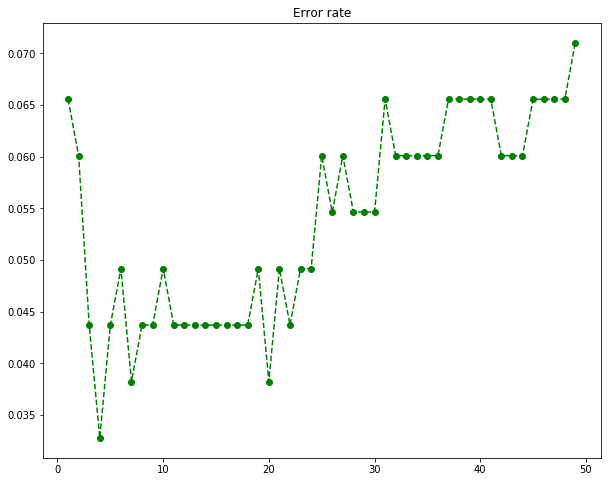

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), Error_rate, marker='o', ls= 'dashed', color='green')
plt.title('Error rate')

In [28]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)


<strong>Further KNN Model EvaluationKNN </strong>

In [29]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.97      0.91      0.94        65
          1       0.95      0.98      0.97       118

avg / total       0.96      0.96      0.96       183



In [30]:
print(metrics.confusion_matrix(y_test, pred))

[[ 59   6]
 [  2 116]]


In [31]:
Knn_accuracy = metrics.accuracy_score(y_test, pred)

In [32]:
x = df

In [33]:
y = cancer['target']

<strong>Splitting up the data for Decision Trees and Random Forests</strong>

In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=84)

<strong>Using Decision Trees</strong>

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tr = DecisionTreeClassifier()

In [38]:
tr.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
d_pred = tr.predict(x_test)

<strong>Decision Tree Model Evaluation </strong>

In [40]:
print(metrics.classification_report(y_test,d_pred))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88        62
          1       0.96      0.92      0.94       126

avg / total       0.92      0.92      0.92       188



In [41]:
metrics.confusion_matrix(y_test, d_pred)

array([[ 57,   5],
       [ 10, 116]], dtype=int64)

In [42]:
Dt_accuracy = metrics.accuracy_score(y_test, d_pred)

<strong>Using Random Forests Classifier </strong>

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
fore = RandomForestClassifier()

In [45]:
fore.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
fore_pred = fore.predict(x_test)

<strong>Random Forests model evaluation</strong>

In [47]:
print(metrics.classification_report(y_test, fore_pred))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92        62
          1       0.98      0.94      0.96       126

avg / total       0.95      0.95      0.95       188



In [48]:
metrics.confusion_matrix(y_test,fore_pred)

array([[ 60,   2],
       [  8, 118]], dtype=int64)

In [49]:
Rf_accuracy = metrics.accuracy_score(y_test,fore_pred)

<strong>Using SVM</strong>

In [50]:
from sklearn.svm import SVC

In [51]:
sprt = SVC()

In [52]:
sprt.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
sv_pred = sprt.predict(x_test)

<strong>SVM model evaluation and rengineering</strong>

In [54]:
metrics.accuracy_score(y_test, sv_pred)

0.6702127659574468

In [55]:
print(metrics.classification_report(y_test, sv_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        62
          1       0.67      1.00      0.80       126

avg / total       0.45      0.67      0.54       188



C:\Users\Rich\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
from sklearn.grid_search import GridSearchCV

C:\Users\Rich\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)



<strong>Finding appropriate C and gamma values </strong>

In [57]:
param_grid = {'C':[0.1, 1,10, 100, 1000], 'gamma':[1000, 100, 10, 1, 0.1, 0.01, 0.001 ]}

In [58]:
grid = GridSearchCV(SVC(), param_grid, verbose=4)

In [59]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] C=0.1, gamma=1000 ...............................................
[CV] ...................... C=0.1, gamma=1000, score=0.606299 -   0.0s
[CV] C=0.1, gamma=1000 ...............................................
[CV] ...................... C=0.1, gamma=1000, score=0.606299 -   0.0s
[CV] C=0.1, gamma=1000 ...............................................
[CV] ...................... C=0.1, gamma=1000, score=0.606299 -   0.0s
[CV] C=0.1, gamma=100 ................................................
[CV] ....................... C=0.1, gamma=100, score=0.606299 -   0.0s
[CV] C=0.1, gamma=100 ................................................
[CV] ....................... C=0.1, gamma=100, score=0.606299 -   0.0s
[CV] C=0.1, gamma=100 ................................................
[CV] ....................... C=0.1, gamma=100, score=0.606299 -   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] ......................... C=0.1, gamma=1, score=0.606299 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.606299 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] 

[CV] ....................... C=100, gamma=0.1, score=0.606299 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.606299 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.614173 -   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...................... C=100, gamma=0.01, score=0.606299 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.913386 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.913386 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.921260 -   0.0s
[CV] C=1000, gamma=1000 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [60]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.001}


In [61]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
g_pred = grid.predict(x_test)

In [63]:
print(metrics.classification_report(y_test, g_pred))

             precision    recall  f1-score   support

          0       0.82      0.94      0.87        62
          1       0.97      0.90      0.93       126

avg / total       0.92      0.91      0.91       188



In [64]:
print(metrics.confusion_matrix(y_test, g_pred))

[[ 58   4]
 [ 13 113]]


In [65]:
svm_accurancy = metrics.accuracy_score(y_test, g_pred)

In [66]:
Acc = [svm_accurancy, Rf_accuracy, Dt_accuracy, Knn_accuracy]

In [75]:
accuracy = pd.DataFrame(Acc, index='Svm_accurancy, Random_Forests_accuracy, Decision_Tree_accuracy, KNN_accuracy'.split(','), columns=['Accuracy_score'])

In [76]:
accuracy

,Accuracy_score
Svm_accurancy,0.909574
Random_Forests_accuracy,0.946809
Decision_Tree_accuracy,0.920213
KNN_accuracy,0.956284
